# Entraînement du modèle

Ici nous allons entraîner notre modèle général. Ce modèle est entrainé sur l'ensemble des voitures ou sur un sous-ensemble du jeu de donnée (filter par classes de voitures).

### Importation des bibliothèques

In [13]:
# Ajout du chemin de nos fichiers d'aides
import os
import sys

sys.path.append(os.path.abspath("../helper"))

In [14]:
from typing import Tuple
import math
import shutil

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch


In [16]:
from model import MyModel
from chargement_donnee import get_dataset_transformation, create_subset, ORIGINAL_PATH_DATASET_IMAGES, PATH_DATASET, get_dataset_loader

### Définition des hyperparamètres

In [17]:
BATCH_SIZE = 32
IMAGE_WIDTH = 512
IMAGE_HEIGHT = 512

### Définition des transformations appliquées sur les données

Les détails du code des deux prochaines sections sont dans 'helper/load_dataset.py'

In [18]:
train_tfms, test_tfms = get_dataset_transformation(IMAGE_WIDTH, IMAGE_HEIGHT)
train_tfms, test_tfms

(Compose(
     Resize(size=(512, 512), interpolation=bilinear, max_size=None, antialias=warn)
     RandomHorizontalFlip(p=0.5)
     RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
     ToTensor()
     Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
 ),
 Compose(
     Resize(size=(512, 512), interpolation=bilinear, max_size=None, antialias=warn)
     ToTensor()
     Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
 ))

### Chargement du jeu de donnée

In [19]:
# Initialiser le chemin de la base de donnée et
# potentiellement prendre un sous ensemble des données 
use_subset = False
if use_subset:
    classes = ['Acura Integra Type R 2001', "Bentley Arnage Sedan 2009", "Chevrolet Camaro Convertible 2012", "Acura TSX Sedan 2012"]
    path_dataset = "dataset/car_data_sub/car_data"
    create_subset(ORIGINAL_PATH_DATASET_IMAGES, path_dataset, classes)
else:
    classes = pd.read_csv(os.path.join(PATH_DATASET, "names.csv"), names=["name"])
    classes = list(classes.name)
    path_dataset = ORIGINAL_PATH_DATASET_IMAGES

In [20]:
nb_classes, train_loader, test_loader = get_dataset_loader(path_dataset, train_tfms, test_tfms)

Number of classes 196
Train dataset size is 8144
Test dataset size is 8041


### Chargement du modèle

Les détails du code est dans le fichier 'helper/model.py'

In [21]:
my_model = MyModel(classes)

device used for the model : cuda


/opt/mamba/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### Entrainement du modèle

In [22]:
training_losses, training_accs, test_accs = my_model.train(train_loader, test_loader, nb_epochs=10)
()

100%|██████████| 255/255 [02:39<00:00,  1.60it/s]


Epoch 1, duration: 159.84543085098267s, loss: 4.6817, acc: 6.9363


100%|██████████| 252/252 [01:01<00:00,  4.13it/s]


Accuracy on test dataset : 21.46


100%|██████████| 255/255 [02:37<00:00,  1.62it/s]


Epoch 2, duration: 157.16654896736145s, loss: 2.5111, acc: 40.6618


100%|██████████| 252/252 [00:55<00:00,  4.55it/s]


Accuracy on test dataset : 42.93


100%|██████████| 255/255 [02:35<00:00,  1.64it/s]


Epoch 3, duration: 155.71994948387146s, loss: 1.3127, acc: 68.8358


100%|██████████| 252/252 [01:02<00:00,  4.03it/s]


Accuracy on test dataset : 60.25


100%|██████████| 255/255 [02:37<00:00,  1.62it/s]


Epoch 4, duration: 157.46063446998596s, loss: 0.7679, acc: 82.0833


100%|██████████| 252/252 [01:04<00:00,  3.89it/s]


Accuracy on test dataset : 75.38


100%|██████████| 255/255 [02:39<00:00,  1.60it/s]


Epoch 5, duration: 159.77176547050476s, loss: 0.5098, acc: 88.3211


100%|██████████| 252/252 [01:07<00:00,  3.71it/s]


Accuracy on test dataset : 81.47


100%|██████████| 255/255 [02:37<00:00,  1.62it/s]


Epoch 6, duration: 157.81064891815186s, loss: 0.3309, acc: 92.8064


100%|██████████| 252/252 [01:00<00:00,  4.19it/s]


Accuracy on test dataset : 81.79


100%|██████████| 255/255 [02:36<00:00,  1.63it/s]


Epoch 7, duration: 156.19681191444397s, loss: 0.2183, acc: 95.4412


100%|██████████| 252/252 [00:56<00:00,  4.48it/s]


Accuracy on test dataset : 82.00


100%|██████████| 255/255 [02:35<00:00,  1.64it/s]


Epoch 8, duration: 155.2624433040619s, loss: 0.1613, acc: 96.7892


100%|██████████| 252/252 [00:55<00:00,  4.50it/s]


Accuracy on test dataset : 85.85


100%|██████████| 255/255 [02:34<00:00,  1.65it/s]


Epoch 9, duration: 154.98522663116455s, loss: 0.1246, acc: 97.3897


100%|██████████| 252/252 [00:56<00:00,  4.47it/s]


Accuracy on test dataset : 87.17


100%|██████████| 255/255 [02:35<00:00,  1.64it/s]


Epoch 10, duration: 155.1485469341278s, loss: 0.0956, acc: 98.1373


100%|██████████| 252/252 [00:58<00:00,  4.29it/s]

Accuracy on test dataset : 87.86
End training


()

### Affichage des résultats de l'entraînement

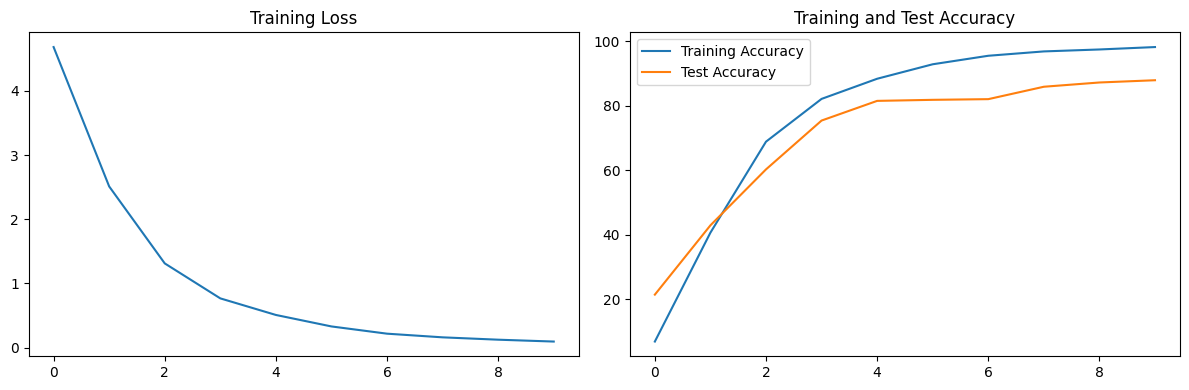

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot training loss
axs[0].plot(training_losses)
axs[0].set_title("Training Loss")

# Plot training and test accuracy
axs[1].plot(training_accs, label="Training Accuracy")
axs[1].plot(test_accs, label="Test Accuracy")
axs[1].set_title("Training and Test Accuracy")
axs[1].legend()

plt.tight_layout()
plt.show()

### Sauvegarde du modèle

In [24]:
my_model.save("../model/model_tmp")

classes saved in : '../model/model_tmp/classes.csv'
model saved in : '../model/model_tmp/model.pth'
